# Question 1

In [15]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
# np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )
x_=[]
y_=[]
for i in X:
    x_.append(i[0])
    y_.append(i[1])
    

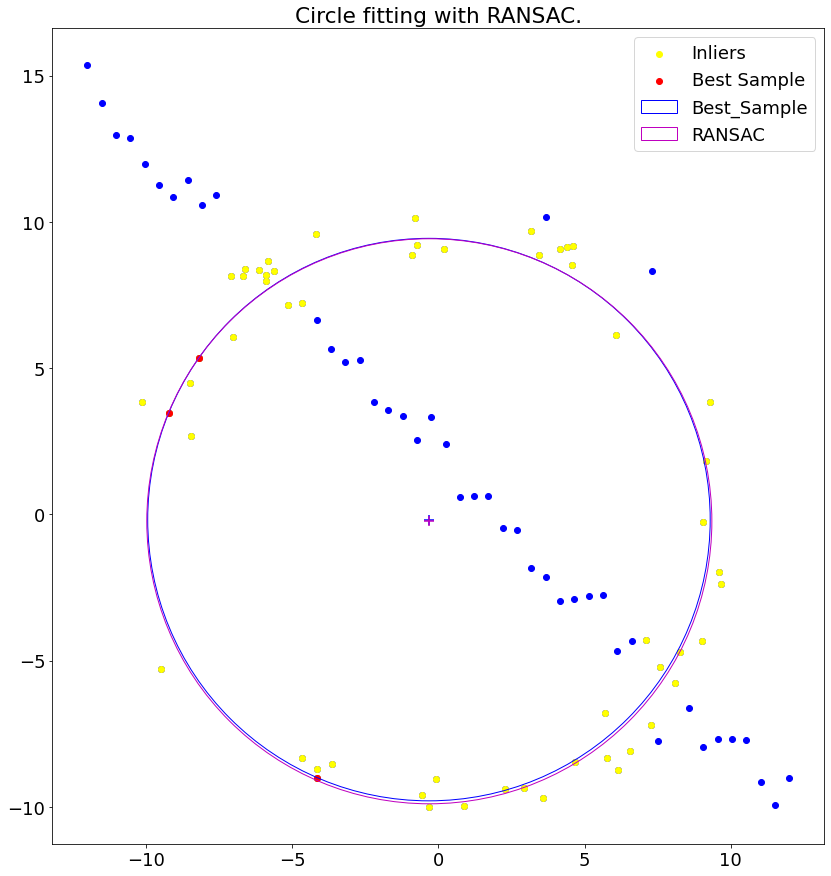

56


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

#Class Object for Generating All required functions for RANSAC 
class RANSAC_gen:
    def __init__(self, x_data, y_data, n):
        self.x_data = x_data
        self.y_data = y_data
        self.n = n
        self.d_max=15
        self.best_model = None
        self.point= None
        self.mod = None
        self.inliers = None
    #Function for Randomly take 3 points sample    
    def random_sampling(self):
        sample = []
        save_ran = []
        count = 0

        # get three points from data
        while True:
            ran = np.random.randint(len(self.x_data))
            if ran not in save_ran:
                sample.append((self.x_data[ran], self.y_data[ran]))
                save_ran.append(ran)
                count += 1

                if count == 3:
                    break

        return sample
    #Function for genarate respective model
    def make_model(self, sample):

        pt1 = sample[0]
        pt2 = sample[1]
        pt3 = sample[2]
       
        A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
        B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
        inv_A = inv(A)

        c_x, c_y = np.dot(inv_A, B) / 2
       
        c_x, c_y = c_x[0], c_y[0]
        r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)
        return c_x, c_y, r
    #Function for filter out inliers
    def get_inliers(self,cx,cy,r):
        P=[]
        t=1.2
        xd=self.x_data
        yd=self.y_data
        for i in range(len(xd)):
            dis = np.sqrt((xd[i]-cx)**2 + (yd[i]-cy)**2)
            if (r-t<=abs(dis)<=r+t):
                P.append([xd[i],yd[i]])
                
        
        return (P)    
    def eval_model(self, model):
        
        c_x, c_y, r = model
        
        P = self.get_inliers(c_x,c_y,r)
        
        return P
    #Find the best model by excuting functions
    def execute_ransac(self):
        # find best model
        
        for i in range(self.n):
            mod=self.random_sampling()
            model = self.make_model(mod)
            c_x, c_y, r = model
            d_temp = self.eval_model(model)
                
            if self.d_max < len(d_temp):
                self.best_model = model
                self.d_max = len(d_temp)
                self.mode = mod
                self.inliers = d_temp
if __name__ == '__main__':
    # make data
    x_data, y_data = x_,y_
    
    plt.scatter(x_data, y_data, c='blue')

    ransac = RANSAC_gen(x_data, y_data, 100)
    
    ransac.execute_ransac()
    
    # get best model sample from ransac
    a, b, r = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]
    Point = ransac.inliers
    
    x_1=[]
    y_1=[]
    for i in Point:
        x_1.append(i[0])
        y_1.append(i[1])
    
    x_2=[]
    y_2=[]
    for i in ransac.mode:
        x_2.append(i[0])
        y_2.append(i[1])
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.rcParams.update({'font.size': 18})
    plt.scatter(x_1,y_1,color = 'yellow',label='Inliers')
    plt.scatter(x_2,y_2,color = 'red',label='Best Sample')
    plt.scatter(a,b,s = 100,c = 'b',marker = '+')
    circle = plt.Circle((a, b), radius=r, color='b', fc='y', fill=False,label = 'Best_Sample')
    
    plt.gca().add_patch(circle)
    
    
    # get best model from ransac for best sample
    ransac = RANSAC_gen(x_1, y_1, 100)
    ransac.execute_ransac()
    a2, b2, r2 = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]
    circle = plt.Circle((a2, b2), radius=r2, color='m', fc='y', fill=False,label = 'RANSAC')
    plt.scatter(a2,b2,s = 100,c = 'm',marker = '+')
    
    plt.gca().add_patch(circle)
    plt.axis('scaled')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [2,3,0,1]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
    plt.title('Circle fitting with RANSAC.')
    plt.show()
    print(len(Point))
    

# Question 2

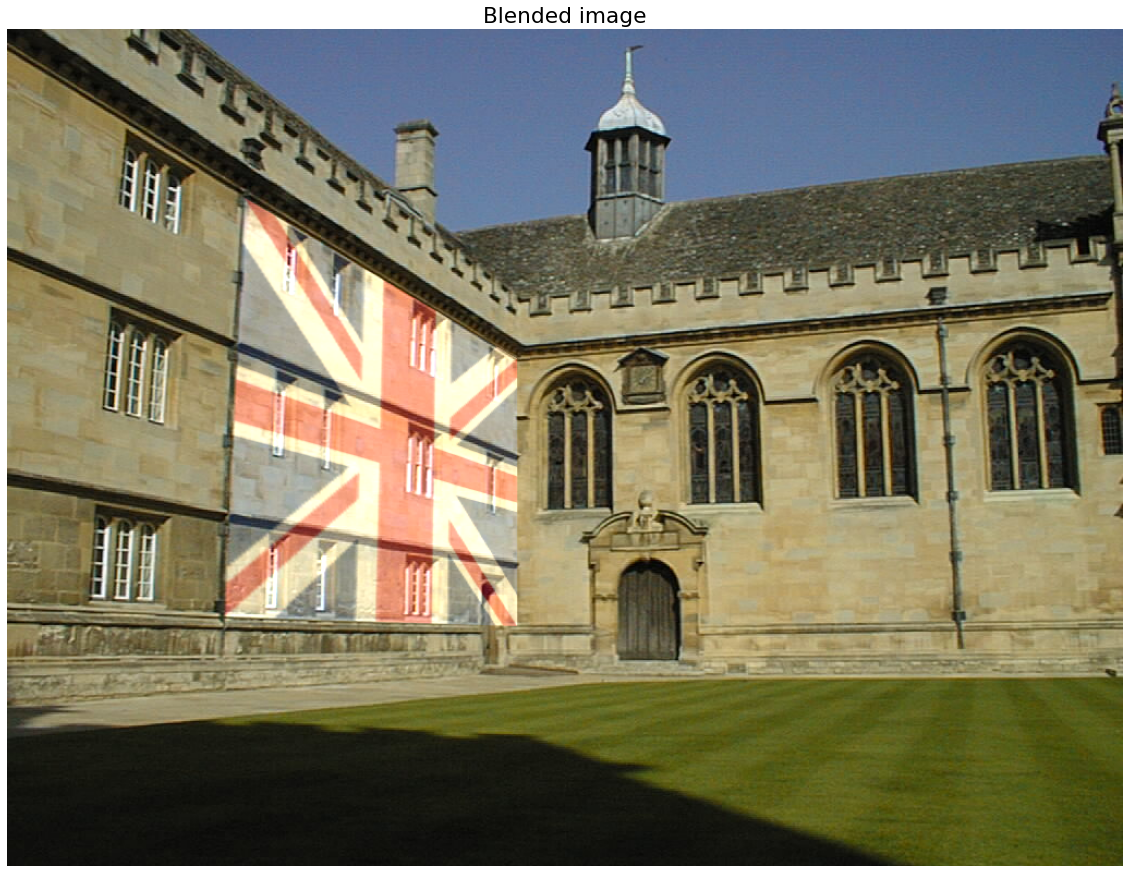

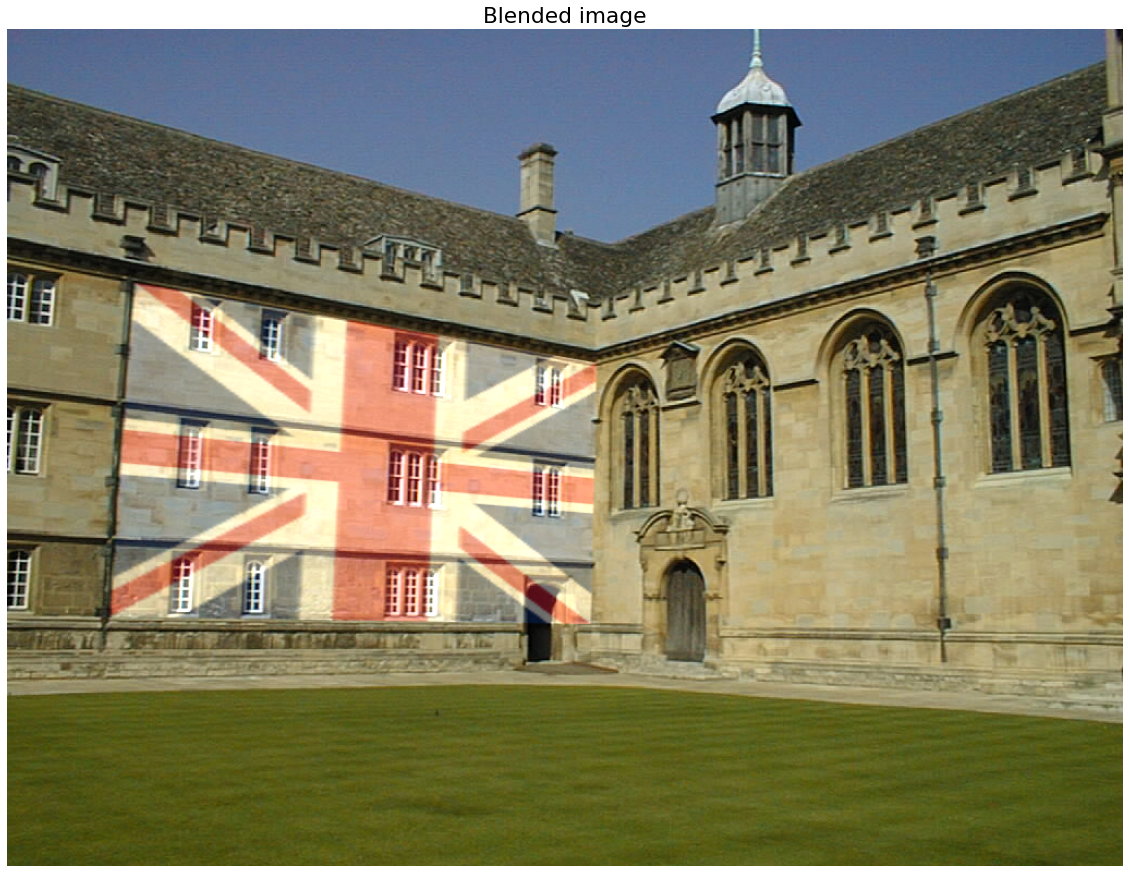

In [69]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image
img2 = cv2.imread('002.jpg')
img1 = cv2.imread('Flag_of_the_United_Kingdom.svg.png')
img3 = cv2.imread('005.jpg')

#Class object for genarate warpped image
class warp_gen:
    def __init__(self,im1,im2,count,Points):
        self.im1 = im1
        self.im2 = im2
        self.count = count
        self.Points = Points
    #function for get coordinates according to mouse clicks
    def Click(self,event,x,y,flags,param):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.Points.append([x,y])
            self.count+=1
    #Function for homography calcultions and warpping/ Blending of the image
    def process(self):
        wname = "Image"
        cv2.namedWindow(winname=wname)
        cv2.setMouseCallback(wname, self.Click)

        
        while self.count<4 :

            cv2.imshow(wname,self.im2)
            cv2.waitKey(1)

        cv2.destroyAllWindows()
        if (len(self.Points)==4):
            im_src = self.im1
            h, w, c = im_src.shape
            
            pts_src = np.array([[0,0],[w-1, 0],[w-1, h-1],[0,h-1]])
            im_dst =self.im2
            
            pts_dst = np.array(self.Points)

            h, status = cv2.findHomography(pts_src, pts_dst)
    
            im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
        
            #Blend the image to get finale proper image
            result = cv2.addWeighted(im_dst,1,im_out ,0.4, 0);
            fig,ax = plt.subplots(1,1,figsize=(20,20))
            plt.rcParams.update({'font.size': 18})
            ax.set_title("Blended image")
            ax.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
            ax.axis('off')
    
if __name__ == '__main__':
    #apply for two separate images to observe the changes
    warp=warp_gen(img1,img3,0,[])
    warp.process()
    warp=warp_gen(img1,img2,0,[])
    warp.process()




# Question 3

## Part (A)

(-0.5, 1599.5, 639.5, -0.5)

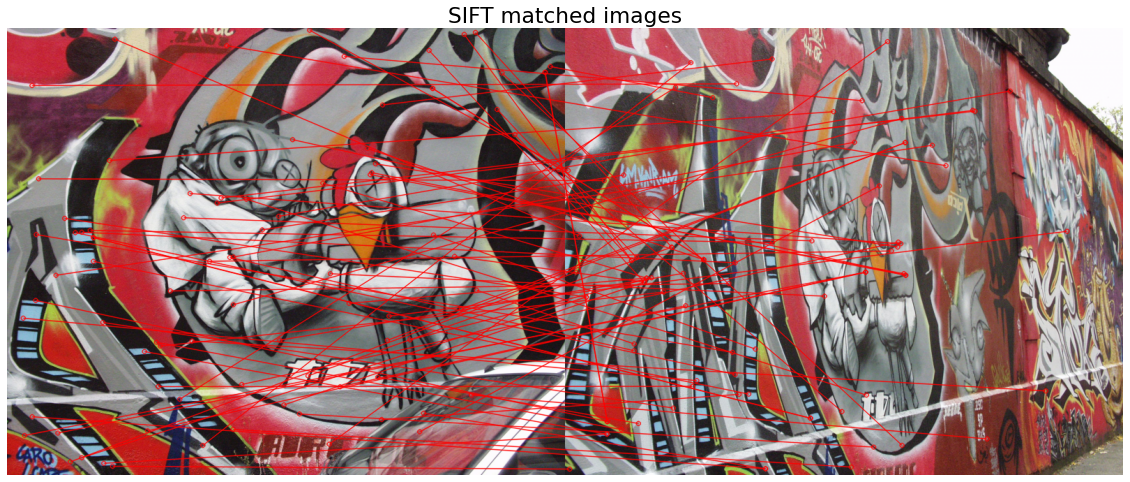

In [67]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math



#Importing the images
img1 = cv2.imread("img1.ppm")
img2 = cv2.imread("img5.ppm")


#Converting images to gray-scale
grayimg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grayimg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#Creating SIFT object
sift = cv2.SIFT_create()

#Finding keypoints and descriptors for images
keyp1, desc1 = sift.detectAndCompute(grayimg1, None)
keyp2, desc2 = sift.detectAndCompute(grayimg2, None)

#Drawing keypoints for images
keyImage1 = cv2.drawKeypoints(grayimg1, keyp1, np.array([]), (0, 0, 255))
keyImage2 = cv2.drawKeypoints(grayimg2, keyp2, np.array([]), (0, 0, 255))

#Brute-Force matching with SIFT descriptors
brutef = cv2.BFMatcher()

#Matching the keypoints with k-nearest neighbor
matches = brutef.knnMatch(desc1, desc2, k=2)

goodMatch = []
#Performing ratio test to find good matches
for m, n in matches:
	if m.distance < 0.75*n.distance:
		goodMatch.append(m)

#Drawing good matches
matchImage = cv2.drawMatches(img1, keyp1, img2, keyp2, goodMatch, np.array([]), (0, 0, 255), flags=2)


#Getting source and destination points
src_pts = np.float32([ keyp1[m.queryIdx].pt for m in goodMatch]).reshape(-1, 1, 2)
dst_pts = np.float32([ keyp2[m.trainIdx].pt for m in goodMatch]).reshape(-1, 1, 2)

#Finding Homography Matrix and mask
homographyMat, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)


matchesMask = mask.ravel().tolist()

h, w = img1.shape[:2]
pts = np.float32([[0,0], [0,h-1], [w-1,h-1], [w-1,0]]).reshape(-1, 1, 2)

matchIndex = []
for i in range(len(matchesMask)):
	if (matchesMask[i]):
		matchIndex.append(i)

matchArray = []
for i in matchIndex:
	matchArray.append(goodMatch[i])

fig,ax = plt.subplots(1,1,figsize=(20,20))
ax.set_title("SIFT matched images")
ax.imshow(cv2.cvtColor(matchImage, cv2.COLOR_BGR2RGB))
ax.axis("off") 



## Part (B) & Part (C) 

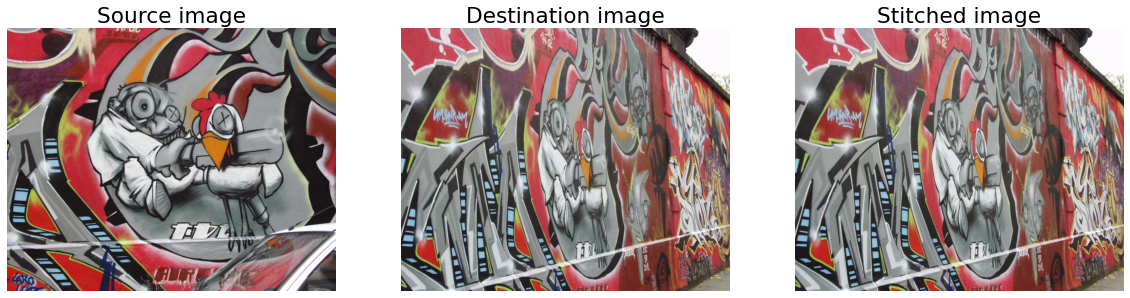

In [66]:
h1, w1 = img2.shape[:2]
h2, w2 = img1.shape[:2]
pts1 = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
pts2 = np.float32([[0, 0], [0, h2], [w2, h2], [w2, 0]]).reshape(-1, 1, 2)
pts2_ = cv2.perspectiveTransform(pts2, homographyMat)
pts = np.concatenate((pts1, pts2_), axis=0)

#Finding the minimum and maximum coordinates
[xmin, ymin] = np.int32(pts.min(axis=0).ravel() - 0.5)
[xmax, ymax] = np.int32(pts.max(axis=0).ravel() + 0.5)
t = [-xmin, -ymin]

#Translating
Ht = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]])

#Warping the first image on the second image using Homography Matrix
result = cv2.warpPerspective(img1, Ht.dot(homographyMat), (xmax-xmin, ymax-ymin))
result[t[1]:h1+t[1], t[0]:w1+t[0]] = img2

fig, ax = plt.subplots(1,3, figsize = (20,20)) 
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) 
ax[0].set_title("Source image")
ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)) 
ax[1].set_title("Destination image")
ax[2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax[2].set_title("Stitched image")

for i in range(3):     
    ax[i].axis("off") 
plt.show()